In [120]:
#  prosmotr dannih i Nachinaem rabotat so stolbzom 'score'.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) #mojno umenshit~uvelichit
pd.set_option('display.max_columns', 50) #mojno umenshit~uvelichit

stud = pd.read_csv('stud_math.csv')
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [121]:
# Prosmotrivaem bolee podrobno kolonku 'score'
stud.score.describe()

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

In [122]:
#prosmatrivaem kakie est stolbzi
stud.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [123]:
display(stud.head(10))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [124]:
display(pd.DataFrame(stud.score.value_counts()))
print("Znachenii vstretivshihsya v stolbze bolee 10 raz:", (stud.score.value_counts()>10).sum())
stud.loc[:, ['score']].info()
# mojno zakluchit, chto iz 394 cheloveka, tolko odin chelovek poluchil 100, 37 chelovek ili ne poshli
#na examen ili nichego ne napisali - poetomu poluchili 0

,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
60.0,31
40.0,31
45.0,27
70.0,27
80.0,16


Znachenii vstretivshihsya v stolbze bolee 10 raz: 12
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   389 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


18


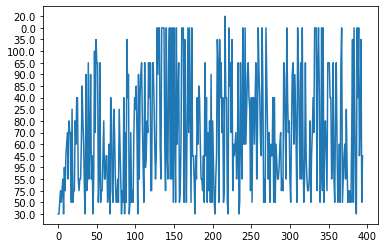

In [114]:
#prosmatrivaem kak znachenia otdelnih elementov na 'score' na grafike
print(stud.score.nunique())
plt.plot(stud.score)

In [115]:
stud.score

0      30.0
1      30.0
2      50.0
3      75.0
4      50.0
       ... 
390    45.0
391    80.0
392    35.0
393    50.0
394    45.0
Name: score, Length: 389, dtype: object

In [110]:
stud = stud.loc[stud.score.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

In [129]:
for column in stud.columns:
    stud[column] = stud[column].astype(str).apply(lambda x: None if x.strip() == '' else x)
#vibros v kolonke score i zamenya znachenie na None:
stud.loc[stud.score=='0.0', 'score'] = None
stud
#uberem znachenie 0 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,nan,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,nan,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,nan,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,nan,no,yes,-6.0,yes,yes,nan,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,nan,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,nan,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,nan,1.0,1.0,3.0,nan,no,no,no,no,-3.0,nan,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,nan,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


<AxesSubplot:>

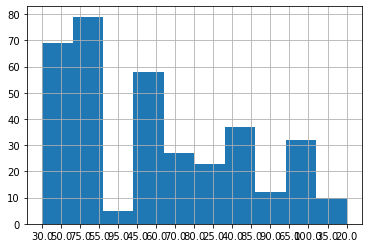

In [130]:
stud.score.hist()
# i smotrim kak viglyadit grafik posle obrabotki
# bila ispolzovana 100-aya sistema ozenok
# bolshinstvo ozenok nahoditsya v diapazone 50-60

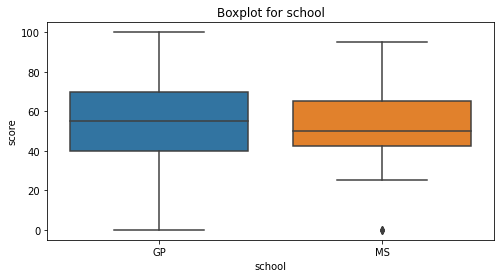

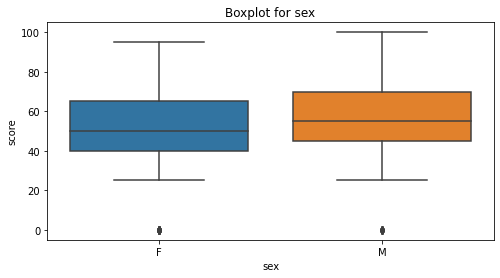

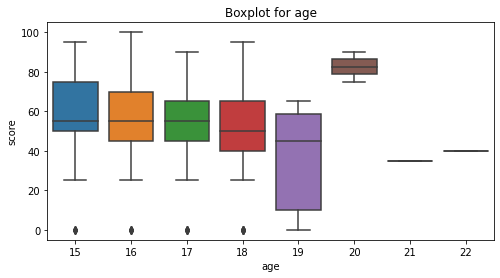

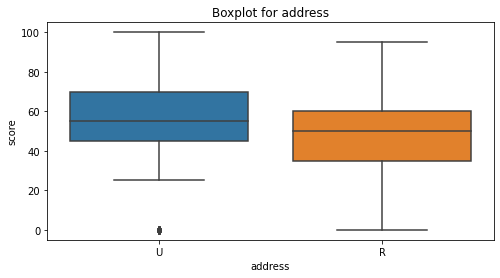

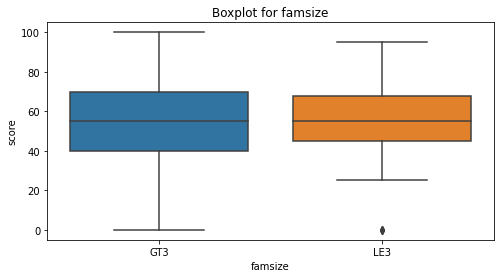

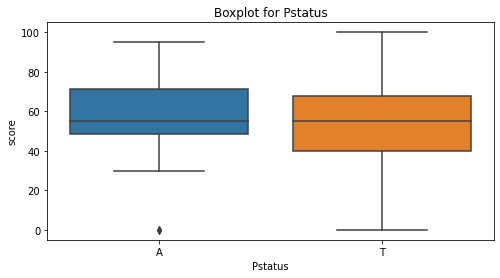

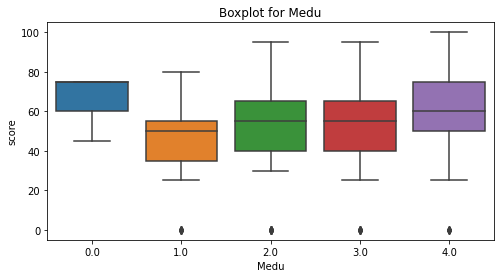

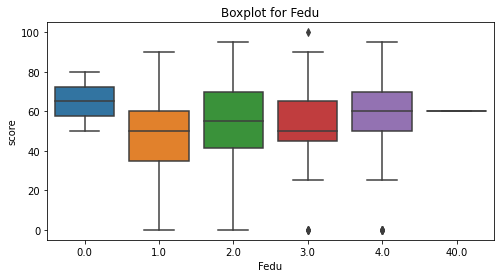

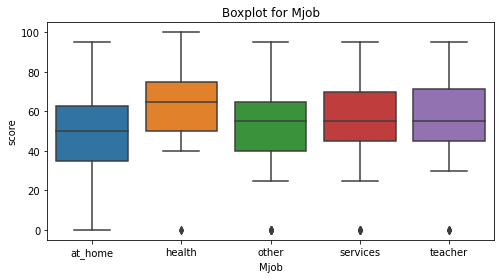

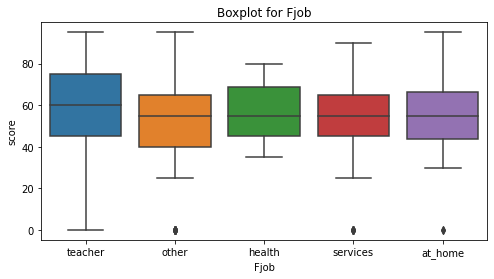

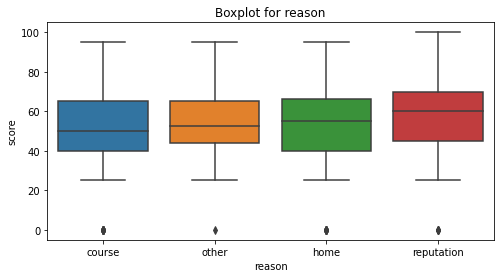

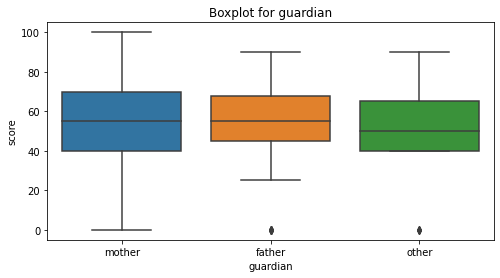

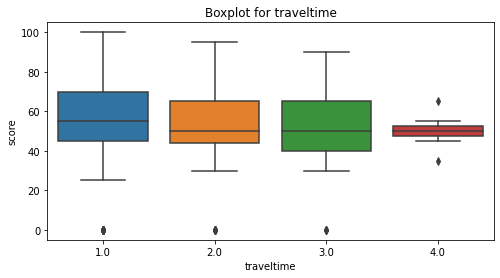

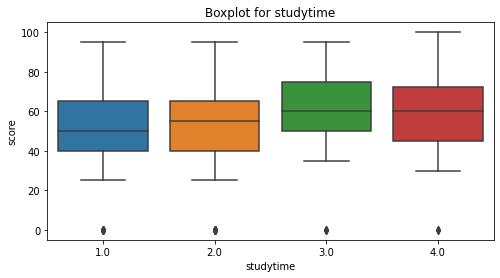

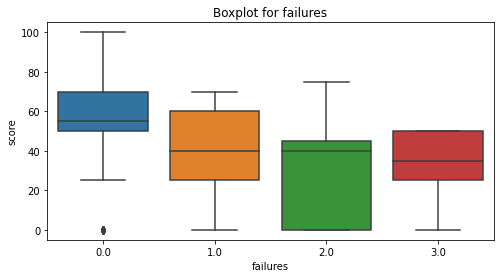

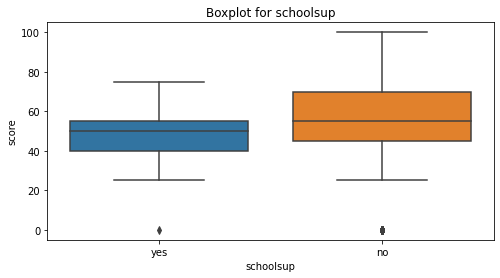

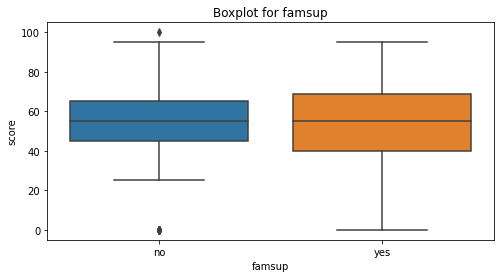

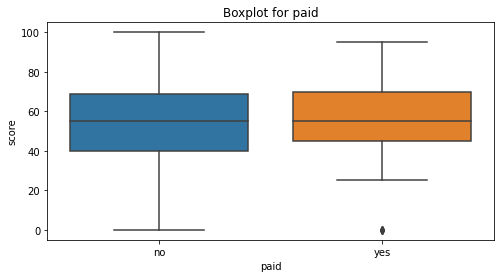

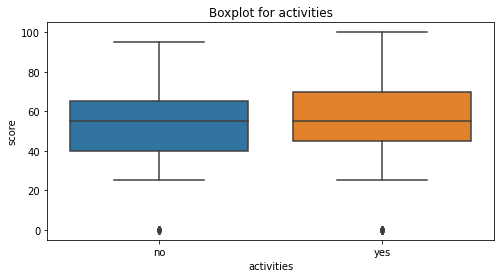

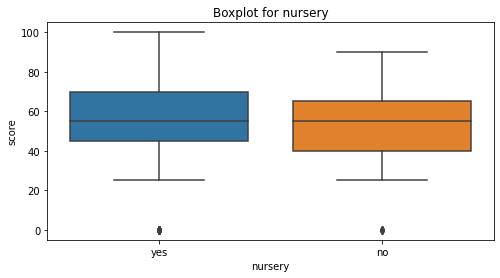

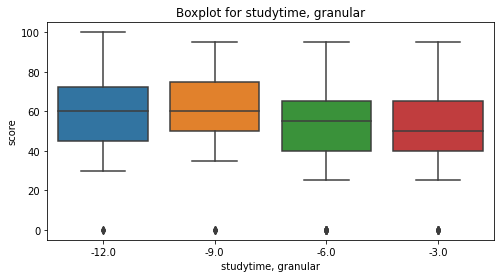

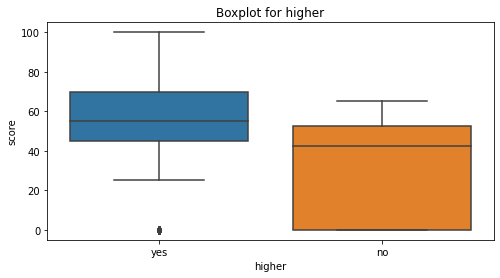

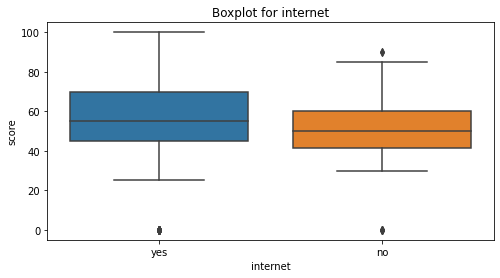

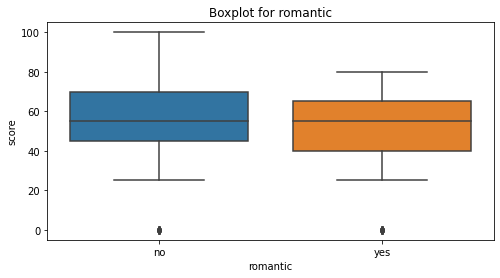

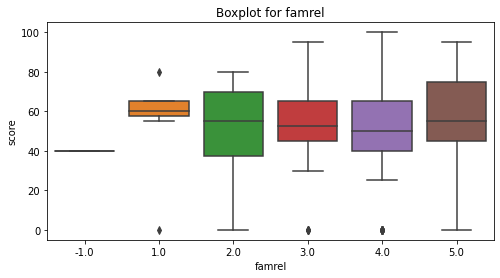

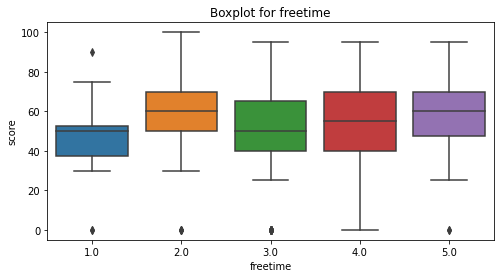

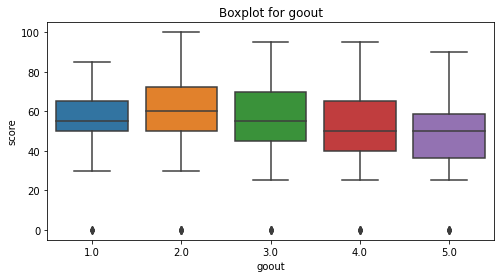

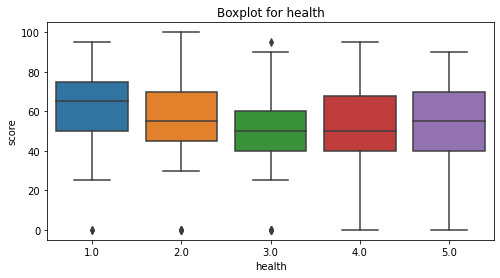

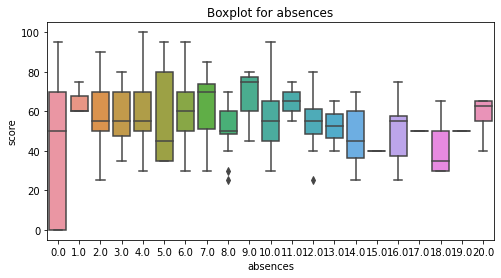

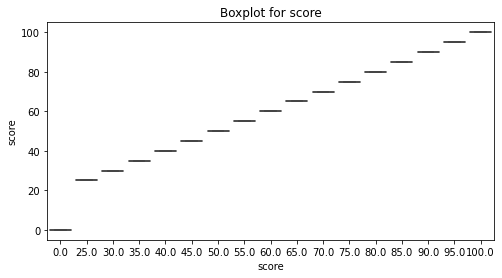

In [29]:
# proveryaem gipotezu
for column in stud.columns:
    fig, ax = plt.subplots(figsize = (8, 4))
    box_plot = sns.boxplot(x=column, y='score', data=stud,ax=ax)
    ax.set_title('Boxplot for ' + column)
    plt.show()
#smotrim, chto mojet povliyat na ozenki: status sovmestnogo jiljya s roditelyami, obrazovanie otza, 
#vremya v puti do shkoli, dop. obrazovatelnaya podderjka, svobodnoe vremya posle shkoli
#i konechno propuski - vibrosi pochishu dalshe

In [ ]:
IQR = stud.absences.quantile(0.75) - stud.absences.quantile(0.25)
perc25 = stud.absences.quantile(0.25)
perc75 = stud.absences.quantile(0.75)
print('25-i perzentil: {},'.format(perc25), 
      '75-i perzentil: {},'.format(perc75), "IQR: {}, ".format(IQR), 
      "garnizi vibrosov: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
stud.absences.loc[stud.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10), label = 'IQR')
 
plt.legend()
#smotrim gde vibrosi v propuskah

In [ ]:
stud = stud.loc[stud.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]#ubiraem

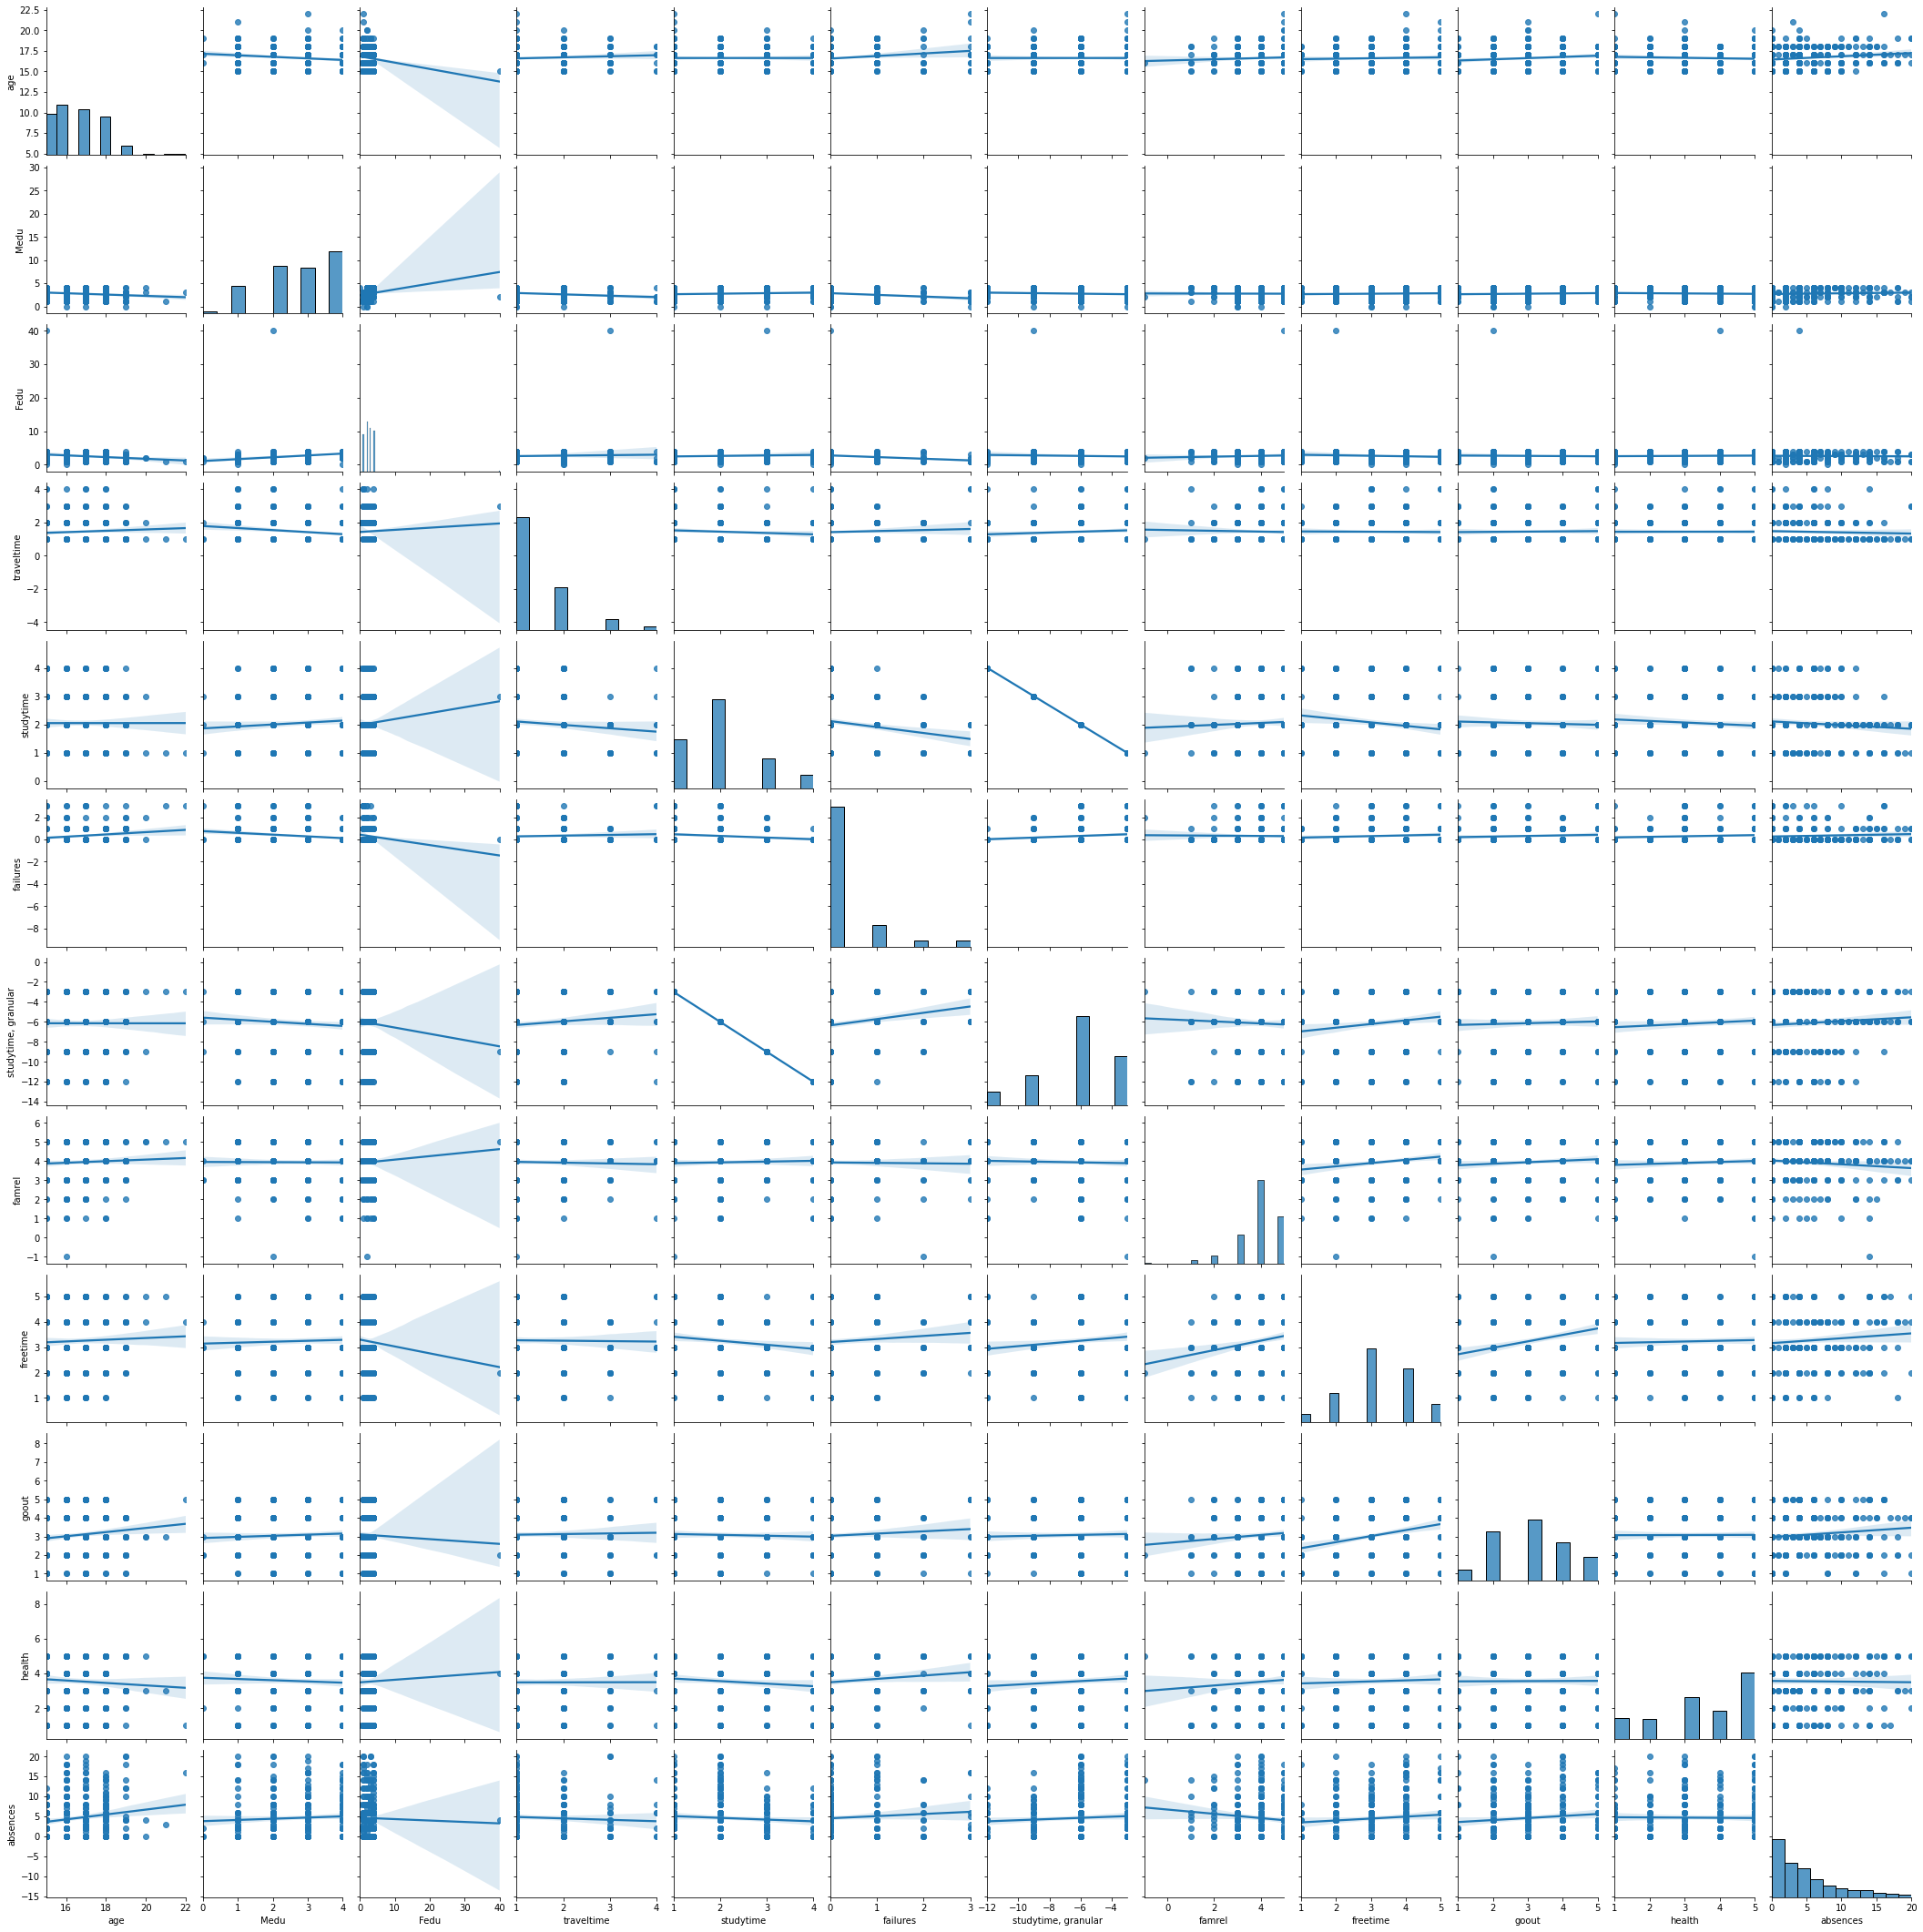

In [45]:
sns.pairplot(stud, kind = 'reg')


In [91]:
stud.corr()
#mojno zakluchit, chto net silnoi korellyazii s kolonkoi score ni v odnom sluchae, 
#edinstvennaya kolonka s kotoroi est ochen slabaya korrelyazia - eto Medu i otrizatelnaya korrelyazia s 
#failure govorit o tom, chto so vremenem rezultat stanovitsya huje.

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.146736,-0.132182,0.073146,-0.018227,0.205919,0.018227,0.060414,0.016099,0.121115,-0.068103,0.096628,-0.155726
Medu,-0.146736,1.000000,0.270754,-0.165838,0.081032,-0.240319,-0.081032,0.000602,0.038265,0.072320,-0.048331,-0.014047,0.213349
Fedu,-0.132182,0.270754,1.000000,0.038990,0.059618,-0.150023,-0.059618,0.045665,-0.062377,-0.019312,0.024861,0.003762,0.078573
traveltime,0.073146,-0.165838,0.038990,1.000000,-0.105910,0.049738,0.105910,-0.027395,-0.026299,0.032629,-0.011724,-0.048242,-0.070559
studytime,-0.018227,0.081032,0.059618,-0.105910,1.000000,-0.181947,-1.000000,0.046249,-0.125066,-0.053831,-0.079180,-0.025707,0.115741
failures,0.205919,-0.240319,-0.150023,0.049738,-0.181947,1.000000,0.181947,-0.034836,0.091608,0.107747,0.088013,0.058166,-0.344338
"studytime, granular",0.018227,-0.081032,-0.059618,0.105910,-1.000000,0.181947,1.000000,-0.046249,0.125066,0.053831,0.079180,0.025707,-0.115741
famrel,0.060414,0.000602,0.045665,-0.027395,0.046249,-0.034836,-0.046249,1.000000,0.174193,0.076387,0.080089,-0.082489,0.057112
freetime,0.016099,0.038265,-0.062377,-0.026299,-0.125066,0.091608,0.125066,0.174193,1.000000,0.296338,0.064315,0.010745,0.019026
goout,0.121115,0.072320,-0.019312,0.032629,-0.053831,0.107747,0.053831,0.076387,0.296338,1.000000,-0.018026,-0.047954,-0.129685
